In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [78]:
palette = ['#003f5c', '#7a5195', '#ef5675', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Distance beetwen AP and STAs [m]"

In [79]:
data = pd.read_csv('tos.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn
0,1,1,1,1,3,49.62230,0.000214,1.430950,54.920600,863665328,...,1121977,1.01926,1.01926,120.997,120.997,120.7360,808811.0,ns3::ThompsonSamplingWifiManager,3,0
1,1,2,1,1,3,49.42960,0.000212,1.426940,55.134500,866968864,...,1121977,1.03053,1.03053,121.000,121.000,120.4400,809628.0,ns3::ThompsonSamplingWifiManager,3,0
2,1,3,1,1,3,2.26261,0.000012,0.073674,106.538000,1675591048,...,1121977,1.00774,1.00774,121.000,121.000,13.2072,80790.2,ns3::ThompsonSamplingWifiManager,3,0
3,1,4,1,1,3,6.09977,0.000021,0.220800,102.359000,1609807592,...,1121977,1.01140,1.01140,121.000,121.000,21.9755,232621.0,ns3::ThompsonSamplingWifiManager,3,0
4,1,1,1,1,3,48.57800,0.000206,1.381530,56.059600,881568904,...,1121977,1.01714,1.01714,120.994,120.994,118.6720,797063.0,ns3::ThompsonSamplingWifiManager,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,209,8,1,1,3,68.07800,0.000458,1.977960,34.803600,547263896,...,1121977,1.01662,1.01662,120.984,120.984,164.0270,708419.0,ns3::ThompsonSamplingWifiManager,7,0
296,209,9,1,1,3,99.26750,0.004581,2.357200,0.801299,12557104,...,1121977,1.16851,1.16851,120.728,120.728,37.6430,19371.4,ns3::ThompsonSamplingWifiManager,7,0
297,209,10,1,1,3,77.15300,0.000535,2.425100,24.903700,391684464,...,1121977,1.00526,1.00526,121.000,121.000,137.0510,621645.0,ns3::ThompsonSamplingWifiManager,7,0
298,209,11,1,1,3,66.61150,0.000425,1.920790,36.404600,572405608,...,1121977,1.02224,1.02224,120.982,120.982,159.2130,719549.0,ns3::ThompsonSamplingWifiManager,7,0


In [80]:
data['tos'] = None
data['BSS'] = None

In [81]:
mask = (data['scenario'] == 1)
data.loc[mask, 'tos'] = 'AC_VO'
mask = (data['scenario'] == 1) & (data['flow'] // 1 == 1)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 1) & (data['flow'] // 1 == 2)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 1) & (data['flow'] // 1 == 3)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 1) & (data['flow'] // 1 == 4)
data.loc[mask, 'BSS'] = 4
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn,tos,BSS
0,1,1,1,1,3,49.62230,0.000214,1.430950,54.920600,863665328,...,1.01926,120.997,120.997,120.7360,808811.0,ns3::ThompsonSamplingWifiManager,3,0,None,None
1,1,2,1,1,3,49.42960,0.000212,1.426940,55.134500,866968864,...,1.03053,121.000,121.000,120.4400,809628.0,ns3::ThompsonSamplingWifiManager,3,0,None,None
2,1,3,1,1,3,2.26261,0.000012,0.073674,106.538000,1675591048,...,1.00774,121.000,121.000,13.2072,80790.2,ns3::ThompsonSamplingWifiManager,3,0,None,None
3,1,4,1,1,3,6.09977,0.000021,0.220800,102.359000,1609807592,...,1.01140,121.000,121.000,21.9755,232621.0,ns3::ThompsonSamplingWifiManager,3,0,None,None
4,1,1,1,1,3,48.57800,0.000206,1.381530,56.059600,881568904,...,1.01714,120.994,120.994,118.6720,797063.0,ns3::ThompsonSamplingWifiManager,2,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,209,8,1,1,3,68.07800,0.000458,1.977960,34.803600,547263896,...,1.01662,120.984,120.984,164.0270,708419.0,ns3::ThompsonSamplingWifiManager,7,0,None,None
296,209,9,1,1,3,99.26750,0.004581,2.357200,0.801299,12557104,...,1.16851,120.728,120.728,37.6430,19371.4,ns3::ThompsonSamplingWifiManager,7,0,None,None
297,209,10,1,1,3,77.15300,0.000535,2.425100,24.903700,391684464,...,1.00526,121.000,121.000,137.0510,621645.0,ns3::ThompsonSamplingWifiManager,7,0,None,None
298,209,11,1,1,3,66.61150,0.000425,1.920790,36.404600,572405608,...,1.02224,120.982,120.982,159.2130,719549.0,ns3::ThompsonSamplingWifiManager,7,0,None,None


In [82]:
mask = (data['scenario'] == 2)
data.loc[mask, 'tos'] = 'AC_VI'
mask = (data['scenario'] == 2) & (data['flow'] // 1 == 1)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 2) & (data['flow'] // 1 == 2)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 2) & (data['flow'] // 1 == 3)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 2) & (data['flow'] // 1 == 4)
data.loc[mask, 'BSS'] = 4

In [83]:
mask = (data['scenario'] == 3)
data.loc[mask, 'tos'] = 'AC_BE'
mask = (data['scenario'] == 3) & (data['flow'] // 1 == 1)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 3) & (data['flow'] // 1 == 2)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 3) & (data['flow'] // 1 == 3)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 3) & (data['flow'] // 1 == 4)
data.loc[mask, 'BSS'] = 4

In [84]:
mask = (data['scenario'] == 4) & (data['flow'] % 2 == 1)
data.loc[mask, 'tos'] = 'AC_VO'
mask = (data['scenario'] == 4) & (data['flow'] % 2 == 0)
data.loc[mask, 'tos'] = 'AC_VI'
mask = (data['scenario'] == 4) & ((data['flow']-1) // 2 == 0)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 4) & ((data['flow']-1) // 2 == 1)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 4) & ((data['flow']-1) // 2 == 2)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 4) & ((data['flow']-1) // 2 == 3)
data.loc[mask, 'BSS'] = 4

In [85]:
mask = (data['scenario'] == 5) & (data['flow'] % 2 == 1)
data.loc[mask, 'tos'] = 'AC_VO'
mask = (data['scenario'] == 5) & (data['flow'] % 2 == 0)
data.loc[mask, 'tos'] = 'AC_BE'
mask = (data['scenario'] == 5) & ((data['flow']-1) // 2 == 0)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 5) & ((data['flow']-1) // 2 == 1)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 5) & ((data['flow']-1) // 2 == 2)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 5) & ((data['flow']-1) // 2 == 3)
data.loc[mask, 'BSS'] = 4

In [86]:
mask = (data['scenario'] == 6) & (data['flow'] % 2 == 1)
data.loc[mask, 'tos'] = 'AC_VI'
mask = (data['scenario'] == 6) & (data['flow'] % 2 == 0)
data.loc[mask, 'tos'] = 'AC_BE'
mask = (data['scenario'] == 6) & ((data['flow']-1) // 2 == 0)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 6) & ((data['flow']-1) // 2 == 1)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 6) & ((data['flow']-1) // 2 == 2)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 6) & ((data['flow']-1) // 2 == 3)
data.loc[mask, 'BSS'] = 4

In [87]:
mask = (data['scenario'] == 7) & (data['flow'] % 3 == 1)
data.loc[mask, 'tos'] = 'AC_VO'
mask = (data['scenario'] == 7) & (data['flow'] % 3 == 2)
data.loc[mask, 'tos'] = 'AC_VI'
mask = (data['scenario'] == 7) & (data['flow'] % 3 == 0)
data.loc[mask, 'tos'] = 'AC_BE'
mask = (data['scenario'] == 7) & ((data['flow']-1) // 3 == 0)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 7) & ((data['flow']-1) // 3 == 1)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 7) & ((data['flow']-1) // 3 == 2)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 7) & ((data['flow']-1) // 3 == 3)
data.loc[mask, 'BSS'] = 4

In [88]:
mask = (data['scenario'] == 8) & (data['flow'] % 4 == 1)
data.loc[mask, 'tos'] = 'AC_VO'
mask = (data['scenario'] == 8) & (data['flow'] % 4 == 2)
data.loc[mask, 'tos'] = 'AC_VI'
mask = (data['scenario'] == 8) & (data['flow'] % 4 == 3)
data.loc[mask, 'tos'] = 'AC_BE'
mask = (data['scenario'] == 8) & (data['flow'] % 4 == 0)
data.loc[mask, 'tos'] = 'AC_BK'
mask = (data['scenario'] == 8) & ((data['flow']-1) // 4 == 0)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 8) & ((data['flow']-1) // 4 == 1)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 8) & ((data['flow']-1) // 4 == 2)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 8) & ((data['flow']-1) // 4 == 3)
data.loc[mask, 'BSS'] = 4

In [89]:
# Flow 0
df0 = (
    data.query("BSS == 1")
        .groupby(['tos', 'scenario', 'distance', 'linksNumber', 'rngRun', 'flow', 'BSS'], as_index=False)
        .sum(numeric_only=True)
        .assign(BSS=1)  # ustawiamy rts na True
)

# Flow 1
df1 = (
    data.query("BSS == 2")
        .groupby(['tos', 'scenario', 'distance', 'linksNumber', 'rngRun', 'flow', 'BSS'], as_index=False)
        .sum(numeric_only=True)
        .assign(BSS=2)  # ustawiamy rts na False
)
df2 = (
    data.query("BSS == 3")
        .groupby(['tos', 'scenario', 'distance', 'linksNumber', 'rngRun', 'flow', 'BSS'], as_index=False)
        .sum(numeric_only=True)
        .assign(BSS=3)  # ustawiamy rts na False
)
df3 = (
    data.query("BSS == 4")
        .groupby(['tos', 'scenario', 'distance', 'linksNumber', 'rngRun', 'flow', 'BSS'], as_index=False)
        .sum(numeric_only=True)
        .assign(BSS=4)  # ustawiamy rts na False
)

In [90]:
df3

,tos,scenario,distance,linksNumber,rngRun,flow,BSS,nStations,loss,jitter,...,txBytes,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,MLOn
0,AC_BE,3,1,3,1,4,4,1,6.09977,0.000021,...,1714380856,1053539,1121977,1.01140,1.01140,121.000,121.000,21.9755,232621.0,0
1,AC_BE,3,1,3,2,4,4,1,6.11055,0.000021,...,1714380856,1053418,1121977,1.00637,1.00637,121.000,121.000,22.0380,236588.0,0
2,AC_BE,3,1,3,3,4,4,1,6.12250,0.000021,...,1714380856,1053284,1121977,1.01065,1.01065,121.000,121.000,22.0414,234031.0,0
3,AC_BE,5,1,3,1,8,4,1,87.78710,0.001268,...,1714380856,137026,1121977,1.26440,1.26440,120.968,120.968,173.6830,409608.0,0
4,AC_BE,5,1,3,3,8,4,1,88.00720,0.001274,...,1714380856,134557,1121977,1.01086,1.01086,120.840,120.840,171.4790,400152.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,AC_VO,8,1,3,201,13,4,1,77.99460,0.000568,...,1714380856,246895,1121977,1.04149,1.04149,121.000,121.000,140.2460,615157.0,0
69,AC_VO,8,1,3,203,13,4,1,77.60380,0.000553,...,1714380856,251280,1121977,1.01416,1.01416,121.000,121.000,138.8630,615977.0,0
70,AC_VO,8,1,3,204,13,4,1,77.83150,0.000564,...,1714380856,248726,1121977,1.01526,1.01526,121.000,121.000,140.2780,614089.0,0
71,AC_VO,8,1,3,205,13,4,1,77.73170,0.000559,...,1714380856,249845,1121977,1.02027,1.02027,121.000,121.000,139.6990,615599.0,0


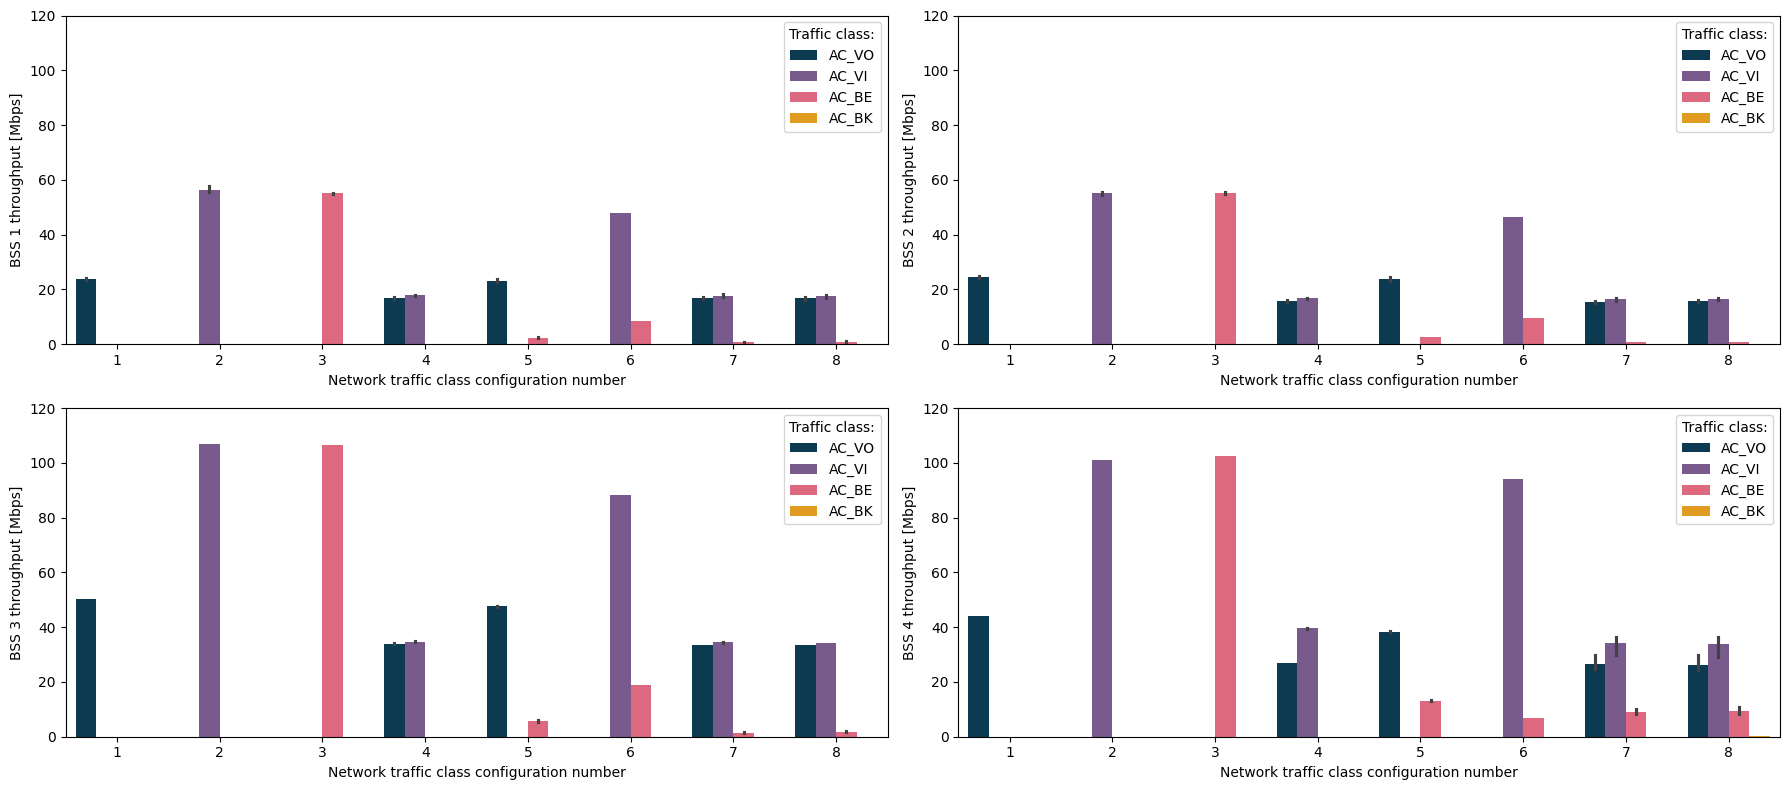

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8), sharey=False)
axes = axes.flatten()  # <- kluczowa poprawka

xlabel = "Network traffic class configuration number"

plot_data = [
    (df0, 'BSS 1 throughput [Mbps]'),
    (df1, 'BSS 2 throughput [Mbps]'),
    (df2, 'BSS 3 throughput [Mbps]'),
    (df3, 'BSS 4 throughput [Mbps]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(
        data=df,
        x='scenario', y='throughput', hue='tos',
        errorbar='ci', palette=palette, dodge=True,
        ax=axes[i]
    )

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:12],
        ncol=1,
        fontsize='medium',
        title='Traffic class:',
        title_fontsize='medium'
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 120)

# ----------- Zapis i wyświetlenie -----------
plt.tight_layout()
plt.savefig('toss_thr.svg', bbox_inches='tight')
plt.show()


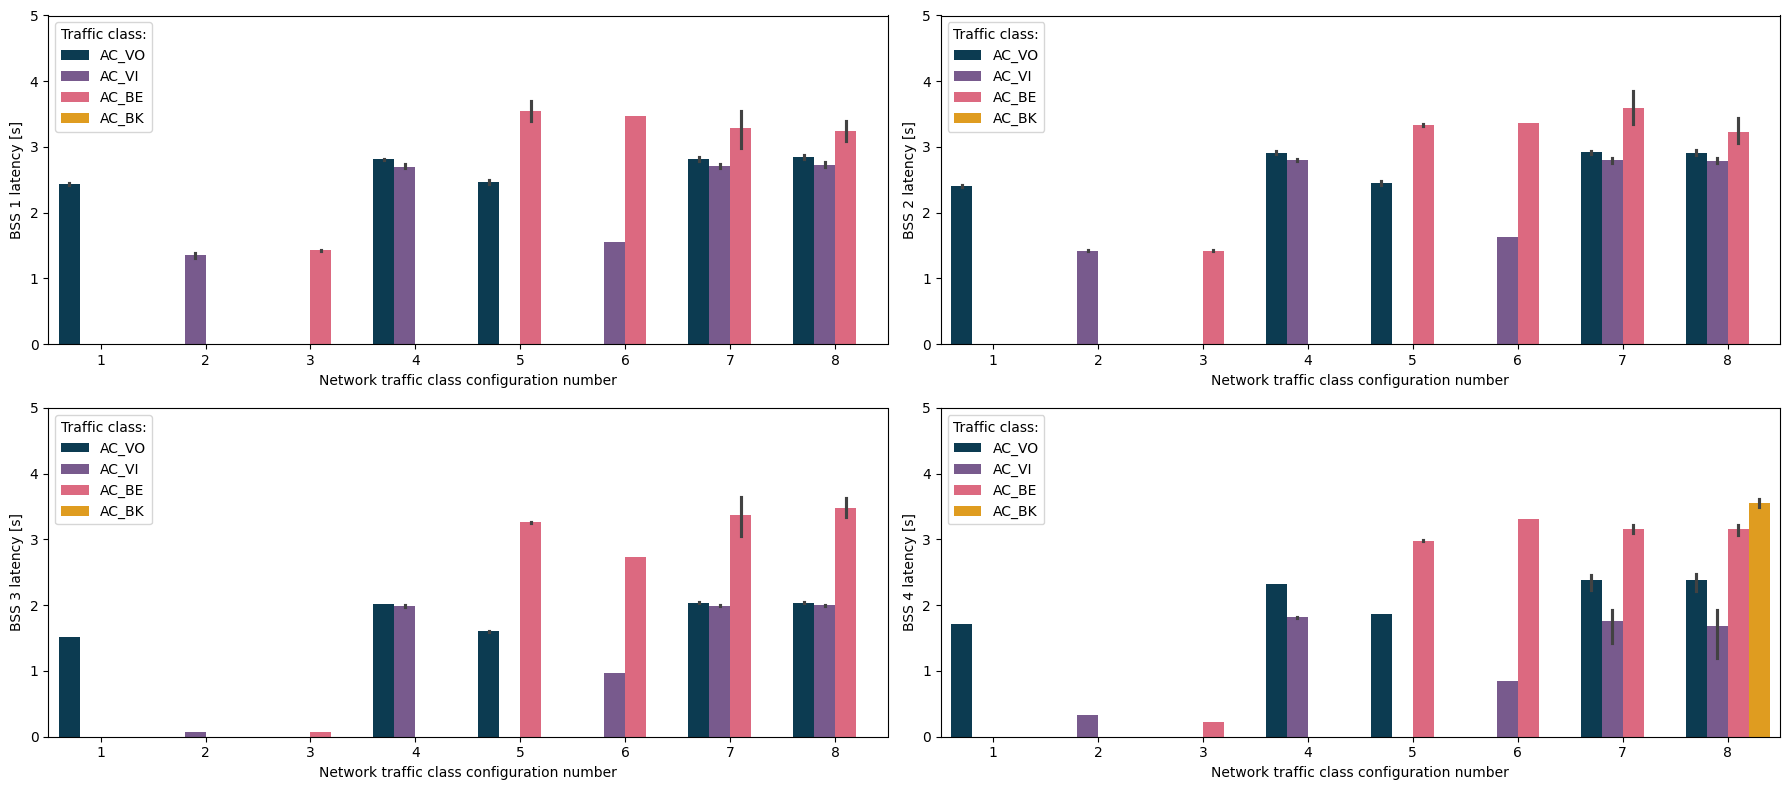

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8), sharey=False)
axes = axes.flatten()  # <- kluczowa poprawka

xlabel = "Network traffic class configuration number"

plot_data = [
    (df0, 'BSS 1 latency [s]'),
    (df1, 'BSS 2 latency [s]'),
    (df2, 'BSS 3 latency [s]'),
    (df3, 'BSS 4 latency [s]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(
        data=df,
        x='scenario', y='latency', hue='tos',
        errorbar='ci', palette=palette, dodge=True,
        ax=axes[i]
    )

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:12],
        ncol=1,
        fontsize='medium',
        title='Traffic class:',
        title_fontsize='medium'
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 5)

# ----------- Zapis i wyświetlenie -----------
plt.tight_layout()
plt.savefig('toss_lat.svg', bbox_inches='tight')
plt.show()


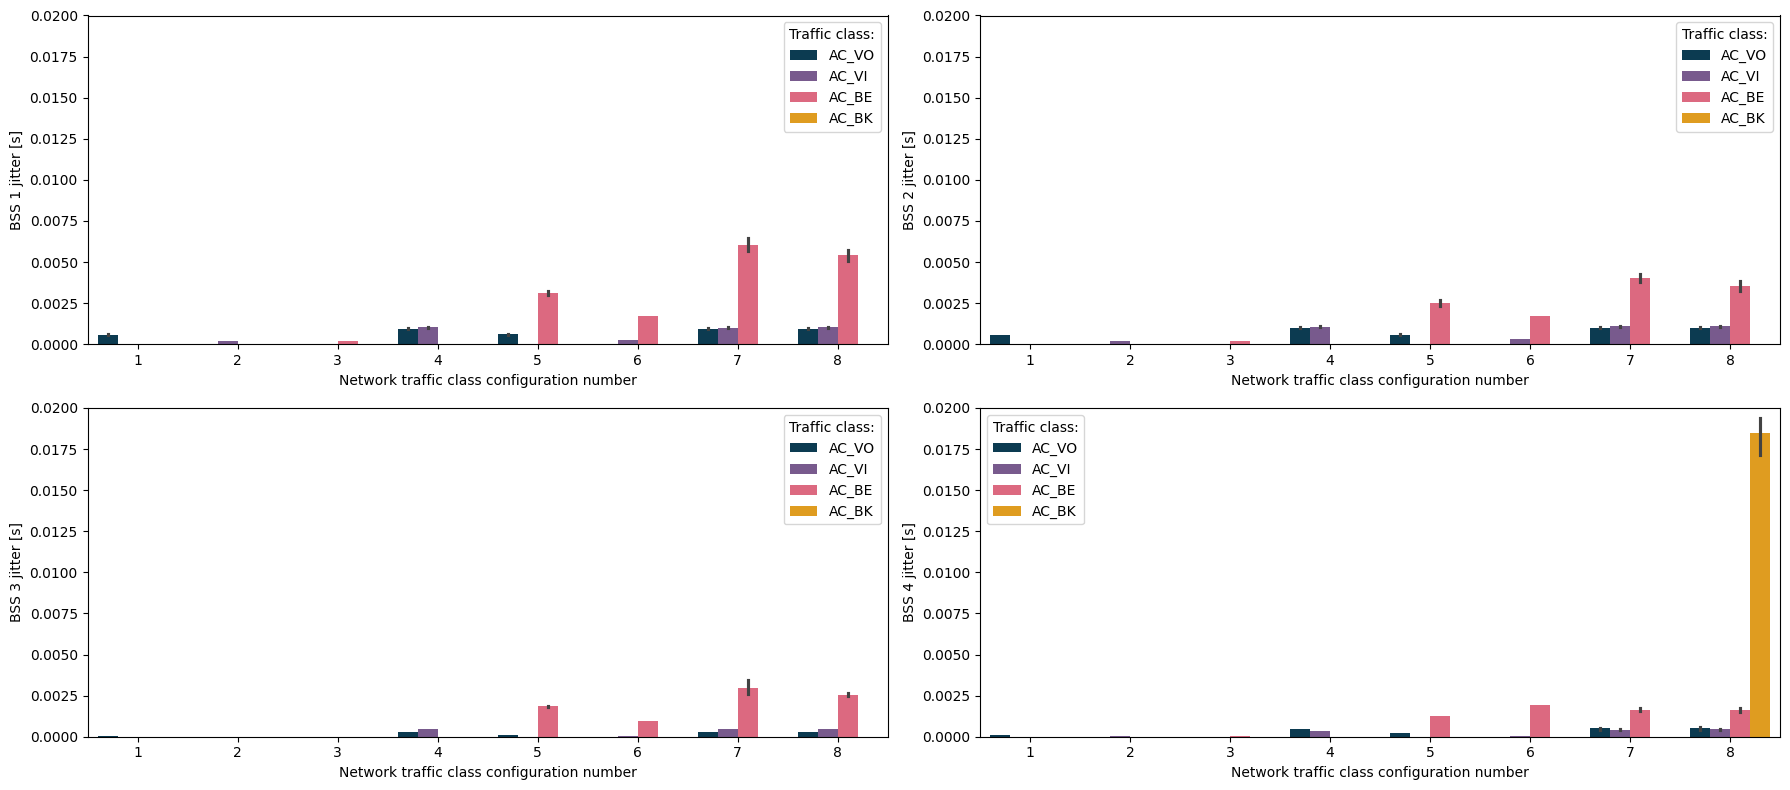

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8), sharey=False)
axes = axes.flatten()  # <- kluczowa poprawka

xlabel = "Network traffic class configuration number"

plot_data = [
    (df0, 'BSS 1 jitter [s]'),
    (df1, 'BSS 2 jitter [s]'),
    (df2, 'BSS 3 jitter [s]'),
    (df3, 'BSS 4 jitter [s]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(
        data=df,
        x='scenario', y='jitter', hue='tos',
        errorbar='ci', palette=palette, dodge=True,
        ax=axes[i]
    )

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:12],
        ncol=1,
        fontsize='medium',
        title='Traffic class:',
        title_fontsize='medium'
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 0.02)

# ----------- Zapis i wyświetlenie -----------
plt.tight_layout()
plt.savefig('toss_jit.svg', bbox_inches='tight')
plt.show()
